# **EduBot: Educational Chatbot Midterm Project**

# **Section 1: Introduction**

---
By dividing the work into clear, focused sections and assigning each to a dedicated team member, we ensure parallel development, streamlined integration, and a robust feedback loop that drives ongoing improvement.

**Team Members name and their assigned parts:**
1. Natalia Solorzano - Sections 2 & 3 (Introduction & Document Ingestion)
2. Katherine Stanton - Sections 4 & 5 (Indexing & Chat Interface)
3. Jaya Verma (Team Manager) - Section 1 and 6 (Feedback Log & Self Learning)
4. Mustafa Yucedag - Section 7 (Saving Logs)
5. Ali Safdar Zaidi - Section 8 (Evaluation)





# **Project Overview:**

EduBot is a retrieval-based educational chatbot that learns over time or by itself. It retrieves relevant information from a provided .txt document, accepts feedback from the user, save the correct answers and logs that data for future improvement.

EduBot begins by loading a user-provided text document (uploading your own text is also available) and then cleans and partitions it into coherent, meaningful chunks. Each chunk is transformed into a dense vector embedding and indexed for lightning-fast similarity searches. Users engage with EduBot through a simple command-line chat interface and it prompts for feedback, and whenever the bot is unsure or makes an error, it requests the correct answer so it can continuously learn and improve. Those corrections are seamlessly appended back into the source text to fuel continuous learning, while every interaction and feedback entry is archived. Finally, EduBot rigorously evaluates its own performance against a set of predefined botanical queries to measure accuracy and guide further refinement.

Project Sections:

1. Introduction
2. Initialization
3. Document Ingestion
4. Indexing
5. Chat Interface
6. Feedback Log and Self Learning
7. Saving Logs
8. Evaluation
9. Conclusion





# **Section 2: Initialization**

In [1]:
# Install dependencies
!pip install -q sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.7 MB/s eta 0:00:00


In [2]:
# Import libraries
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

In [3]:
# Load Embedding Model
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# **Section 3: Document Ingestion**

In [4]:
# Example sample .txt file
sample_text = """
Photosynthesis is the process by which green plants convert sunlight into chemical energy.
Photosynthesis happens in the chloroplasts of plants.
It primarily takes place in the chloroplasts of plant cells using chlorophyll.
During photosynthesis, plants split water molecules and release oxygen as a byproduct.
Mitochondria are the organelles responsible for cellular respiration in most eukaryotic organisms.
The water cycle includes processes like evaporation, condensation, precipitation, and collection.
"""

In [5]:
# Creating a txt file and adding the sample_text to it
with open("study_guide.txt", "w", encoding="utf-8") as f:
  f.write(sample_text)

In [6]:
#Function to load text file
def read_text_file(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        return f.read()

In [7]:
#Ask user if they want to provide an alternate file with input text
file_path = ""
user_input = input("Do you want to provide an alternate file with input text? (yes/no): ")

Do you want to provide an alternate file with input text? (yes/no): no


In [8]:
#User to provide file path name
if user_input.lower() == "yes":
  file_path = input("Please enter the file path: ")

In [9]:
# Load the text file
if file_path != "":
  raw_text = read_text_file(file_path)
else:
  raw_text = read_text_file("study_guide.txt")

In [10]:
# Preview raw text
print(raw_text[:500])


Photosynthesis is the process by which green plants convert sunlight into chemical energy.
Photosynthesis happens in the chloroplasts of plants.
It primarily takes place in the chloroplasts of plant cells using chlorophyll.
During photosynthesis, plants split water molecules and release oxygen as a byproduct.
Mitochondria are the organelles responsible for cellular respiration in most eukaryotic organisms.
The water cycle includes processes like evaporation, condensation, precipitation, and col


In [11]:
# Clean the text
import re

In [12]:
# Function to clean text
def clean_text(text):
  return re.sub(r'\s+', ' ', text).strip()

# **Section 4: Indexing**

In [13]:
# Split Document into Chunks
def chunk_text(cleaned_text):
  chunks = [chunk.strip() for chunk in cleaned_text.split('.') if chunk.strip()]
  return chunks

In [14]:
print(chunk_text(raw_text))

['Photosynthesis is the process by which green plants convert sunlight into chemical energy', 'Photosynthesis happens in the chloroplasts of plants', 'It primarily takes place in the chloroplasts of plant cells using chlorophyll', 'During photosynthesis, plants split water molecules and release oxygen as a byproduct', 'Mitochondria are the organelles responsible for cellular respiration in most eukaryotic organisms', 'The water cycle includes processes like evaporation, condensation, precipitation, and collection']


In [15]:
# Convert Chunks to Embeddings
def get_embeddings(chunks):
  embeddings = model.encode(chunks)
  return embeddings

In [16]:
print(get_embeddings(chunk_text(raw_text)))

[[-0.03746832  0.08341513 -0.07408398 ...  0.00642773  0.11970276
   0.03669469]
 [-0.09241229  0.05431336 -0.06505557 ...  0.05465455  0.10240392
   0.03836809]
 [-0.03043448  0.06134078 -0.08466677 ...  0.07146075  0.11353976
   0.08455159]
 [-0.07928682  0.04105349 -0.05025402 ...  0.02758326  0.10423808
   0.00959533]
 [-0.02425315 -0.01911802 -0.03006259 ...  0.06686077  0.12634906
  -0.02936398]
 [-0.05585502 -0.00576352  0.00807573 ...  0.01571754  0.04584507
  -0.03591986]]


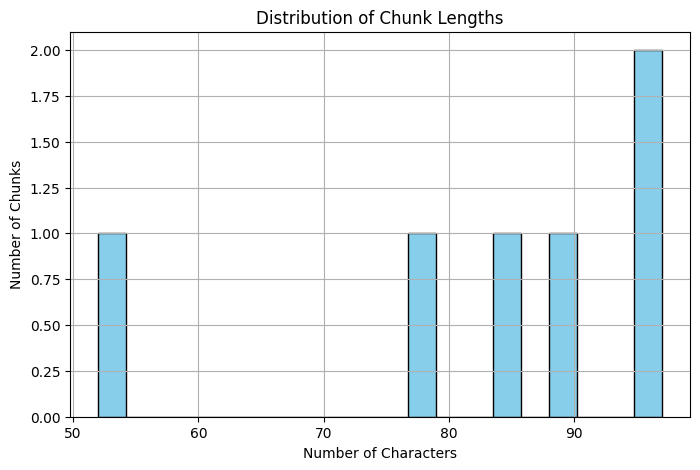

In [17]:
# Visualization: Chunk Length Distribution

import matplotlib.pyplot as plt

# Call chunk_text with raw_text to get chunks
chunks = chunk_text(raw_text)

chunk_lengths = [len(chunk) for chunk in chunks]

plt.figure(figsize=(8, 5))
plt.hist(chunk_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Chunk Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Chunks')
plt.grid(True)
plt.show()

In [18]:
# Index Embeddings with FAISS
def index_embeddings(embeddings):
  index = faiss.IndexFlatL2(embeddings[0].shape[0])
  index.add(np.array(embeddings))
  return index

In [19]:
print(index_embeddings(get_embeddings(chunk_text(raw_text))).ntotal)

6


In [20]:
# Preview Final Text
cleaned_text = clean_text(raw_text)
chunks = chunk_text(cleaned_text)

In [21]:
embeddings = get_embeddings(chunks)

In [22]:
index = index_embeddings(embeddings)

In [23]:
print(cleaned_text[:500])

Photosynthesis is the process by which green plants convert sunlight into chemical energy. Photosynthesis happens in the chloroplasts of plants. It primarily takes place in the chloroplasts of plant cells using chlorophyll. During photosynthesis, plants split water molecules and release oxygen as a byproduct. Mitochondria are the organelles responsible for cellular respiration in most eukaryotic organisms. The water cycle includes processes like evaporation, condensation, precipitation, and coll


In [24]:
# Search Index Function
def search_index(query, k=1):
  query_vec = model.encode([query])
  D, I = index.search(np.array(query_vec), k)
  return [chunks[i] for i in I[0]]

# **Section 5: Chat Interface**

In [25]:
chat_history = []

In [26]:
# Adding to Chat History
def add_to_history(role, message):
  chat_history.append({'role': role, 'message': message})

In [27]:
# Creating Chatbot Reply
def chatbot_reply(query):
  results = search_index(query, k=1)
  return results[0] if results else "I'm not sure, could you clarify?"

In [28]:
# Executing Chat History and Chatbot Reply
def chat_with_context(query):
  add_to_history('user', query)
  response = chatbot_reply(query)
  add_to_history('bot', response)
  return response

In [29]:
# Simulate Chat Input
while True:
    user_query = input("Question (type 'exit' to quit or ask question): ")
    if user_query.lower() in ('exit', 'quit'):
        print("Goodbye!")
        break
    bot_response = chat_with_context(user_query)
    print("EduBot:", bot_response)

Question (type 'exit' to quit or ask question): What is photosynthesis?
EduBot: Photosynthesis is the process by which green plants convert sunlight into chemical energy
Question (type 'exit' to quit or ask question): exit
Goodbye!


In [30]:
# View Full Chat History
for turn in chat_history:
  prefix = "Question" if turn['role'] == 'user' else "EduBot"
  print(f"{prefix}: {turn['message']}")

Question: What is photosynthesis?
EduBot: Photosynthesis is the process by which green plants convert sunlight into chemical energy


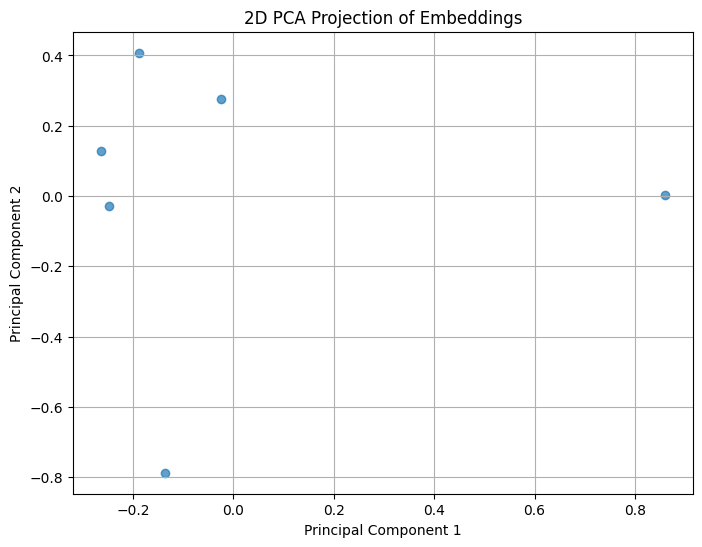

In [31]:
# Visualization: 2D Projection of Text Embeddings (PCA)

from sklearn.decomposition import PCA
import numpy as np

X = np.array(embeddings)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.7)
plt.title('2D PCA Projection of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# **Section 6: Feedback Log and Self Learning**

In [32]:
feedback_log = []

In [33]:
#Ask user if they want to provide feedback on the responses
user_input = input("Do you want to provide feedback on the responses? (yes/no): ")

Do you want to provide feedback on the responses? (yes/no): yes


In [34]:
# Creating Feedback Response
def get_feedback():
  print("Was this answer helpful? (y/n)")
  response = input().strip().lower()
  return response == 'y'

In [35]:
# Updating ChatBot Response to Correct Response
def collect_correction():
  print("Please enter the correct answer:")
  response = input().strip()
  return response

In [36]:
# Updating Study_guide.txt With Correct Response
def update_study_guide():
  with open("study_guide.txt", "a", encoding="utf-8") as f:
    f.write(new_response + "\n")
  print("EduBot: Answer saved to study_guide.txt.")

In [37]:
# Creating Feedback Loop with User Input
if user_input.lower() == "yes":
  while True:
      user_query = input("Question (type 'exit' to quit or ask question): ")
      if user_query.lower() in ('exit', 'quit'):
          print("Goodbye!")
          break

      bot_response = chat_with_context(user_query)
      print("EduBot:", bot_response)

      # Calling feedback function
      helpful = get_feedback()
      feedback_log.append({
          'question': user_query,
          'response': bot_response,
          'helpful': helpful
      })

  #    for n in feedback_log:
      if not helpful:
        new_response = collect_correction()
        feedback_log.append({
            'question': user_query,
            'response': new_response,
            'helpful': True
        })
        update_study_guide()

        # Updating Final Text
        raw_text = read_text_file("study_guide.txt")
        cleaned_text = clean_text(raw_text)
        chunks = chunk_text(cleaned_text)
        embeddings = get_embeddings(chunks)
        index = index_embeddings(embeddings)



Question (type 'exit' to quit or ask question): What is photosynthesis?
EduBot: Photosynthesis is the process by which green plants convert sunlight into chemical energy
Was this answer helpful? (y/n)
y
Question (type 'exit' to quit or ask question): What is the function of chylorphyll?
EduBot: It primarily takes place in the chloroplasts of plant cells using chlorophyll
Was this answer helpful? (y/n)
n
Please enter the correct answer:
Chlorophyll's primary function is to absorb light energy, primarily sunlight, and convert it into chemical energy that plants use for photosynthesis.
EduBot: Answer saved to study_guide.txt.
Question (type 'exit' to quit or ask question): exit
Goodbye!


In [38]:
# Evaluation using Feedback Log

# Calculate Accuracy
correct_responses = sum(1 for entry in feedback_log if entry['helpful'])
total_responses = len(feedback_log)
accuracy = (correct_responses / total_responses) * 100 if total_responses else 0

print(f"Accuracy based on feedback: {accuracy:.2f}%")

Accuracy based on feedback: 66.67%


In [39]:
# Printing Feedback Log, Raw Text, and Cleaned Text
print(feedback_log)

[{'question': 'What is photosynthesis?', 'response': 'Photosynthesis is the process by which green plants convert sunlight into chemical energy', 'helpful': True}, {'question': 'What is the function of chylorphyll?', 'response': 'It primarily takes place in the chloroplasts of plant cells using chlorophyll', 'helpful': False}, {'question': 'What is the function of chylorphyll?', 'response': "Chlorophyll's primary function is to absorb light energy, primarily sunlight, and convert it into chemical energy that plants use for photosynthesis.", 'helpful': True}]


In [40]:
print(raw_text)


Photosynthesis is the process by which green plants convert sunlight into chemical energy.
Photosynthesis happens in the chloroplasts of plants.
It primarily takes place in the chloroplasts of plant cells using chlorophyll.
During photosynthesis, plants split water molecules and release oxygen as a byproduct.
Mitochondria are the organelles responsible for cellular respiration in most eukaryotic organisms.
The water cycle includes processes like evaporation, condensation, precipitation, and collection.
Chlorophyll's primary function is to absorb light energy, primarily sunlight, and convert it into chemical energy that plants use for photosynthesis.



In [41]:
print(cleaned_text[:1000])

Photosynthesis is the process by which green plants convert sunlight into chemical energy. Photosynthesis happens in the chloroplasts of plants. It primarily takes place in the chloroplasts of plant cells using chlorophyll. During photosynthesis, plants split water molecules and release oxygen as a byproduct. Mitochondria are the organelles responsible for cellular respiration in most eukaryotic organisms. The water cycle includes processes like evaporation, condensation, precipitation, and collection. Chlorophyll's primary function is to absorb light energy, primarily sunlight, and convert it into chemical energy that plants use for photosynthesis.


# **Section 7: Saving Logs**

In [42]:
import json

In [43]:
# Creating Feedback Log Function
def save_feedback_log(filename="feeback_log.jsonl"):
  with open(filename, "w", encoding="utf-8") as f:
    for item in feedback_log:
      json.dump(item, f)
      f.write('\n')

In [44]:
# Creating Chat History Function
def save_chat_history(filename="chat_log.json"):
  with open(filename, "w", encoding="utf-8") as f:
    json.dump(chat_history, f, indent=2)

In [45]:
# Saving Chat History and Feedback Log Functions
def save_all_logs():
  save_chat_history()
  save_feedback_log()

In [46]:
# Saving Chat History and Feedback Log
save_all_logs()

# **Section 8: Evaluation**

In [47]:
# Creating Test Cases
test_cases = [
    {"query": "Where does photosynthesis happen?", "expected": "chloroplasts"},
    {"query": "What is the function of mitochondria?", "expected": "cellular respiration"},
    {"query": "Name the steps in the water cycle.", "expected": "evaporation"},
    {"query": "What pigment, found in chloroplasts, reflects green light?", "expected": "chlorophyll"},
    {"query": "What is the function of chylorphyll?","expected": "Chlorophyll's primary function is to absorb light energy, primarily sunlight, and convert it into chemical energy that plants use for photosynthesis"}

]

In [48]:
# Creating matrix With Actual Chatbot Answers
for case in test_cases:
  case["actual"] = chatbot_reply(case["query"])

In [49]:
# Creating a Function to Evaluate Cases
def evaluate_case(expected, actual):
  return expected.lower() in actual.lower()

In [50]:
# Printing Pass and Fail for the Test Cases
if user_input.lower() == "yes":
  for case in test_cases:
    case["score"] = int(evaluate_case(case["expected"], case["actual"]))
    print(f"Query: {case['query']}\nExpected: {case['expected']}\nActual: {case['actual']}\nResult: {'✅ Pass' if case['score'] else '❌ Fail'}\n")

Query: Where does photosynthesis happen?
Expected: chloroplasts
Actual: Photosynthesis happens in the chloroplasts of plants
Result: ✅ Pass

Query: What is the function of mitochondria?
Expected: cellular respiration
Actual: Mitochondria are the organelles responsible for cellular respiration in most eukaryotic organisms
Result: ✅ Pass

Query: Name the steps in the water cycle.
Expected: evaporation
Actual: The water cycle includes processes like evaporation, condensation, precipitation, and collection
Result: ✅ Pass

Query: What pigment, found in chloroplasts, reflects green light?
Expected: chlorophyll
Actual: Photosynthesis happens in the chloroplasts of plants
Result: ❌ Fail

Query: What is the function of chylorphyll?
Expected: Chlorophyll's primary function is to absorb light energy, primarily sunlight, and convert it into chemical energy that plants use for photosynthesis
Actual: Chlorophyll's primary function is to absorb light energy, primarily sunlight, and convert it into ch

In [51]:
# Calculating Accuracy
if user_input.lower() == "yes":
  correct = sum(case["score"] for case in test_cases)
  accuracy = correct / len(test_cases) * 100

In [52]:
#Print Accuracy
if user_input.lower() == "yes":
  print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 80.00%


In [53]:
print(chat_history)

[{'role': 'user', 'message': 'What is photosynthesis?'}, {'role': 'bot', 'message': 'Photosynthesis is the process by which green plants convert sunlight into chemical energy'}, {'role': 'user', 'message': 'What is photosynthesis?'}, {'role': 'bot', 'message': 'Photosynthesis is the process by which green plants convert sunlight into chemical energy'}, {'role': 'user', 'message': 'What is the function of chylorphyll?'}, {'role': 'bot', 'message': 'It primarily takes place in the chloroplasts of plant cells using chlorophyll'}]


## **Section 9: Conclusion**


1. Initialization completed: all dependencies installed and the embedding model loaded.
2. Document ingestion module reads and previews raw text successfully.
3. Text cleaning standardizes whitespace and formatting.
4. Chunking function splits the document into semantically coherent units.
5. Embedding pipeline encodes all chunks into vector representations.
6. FAISS index built to support fast nearest-neighbor search.
7. Chat interface maintains history and retrieves answers based on similarity.
8. Feedback mechanism prompts users for corrections when the bot is unsure or incorrect.
9. Feedback logging persists user responses and corrections in a JSON-lines file. Also, it will give accuracy based on the Feedback log.
10. Chat history saving archives all interactions for audit and review.
11. Evaluation suite defined five test cases covering core botanical questions.
12. Performance metric: achieved 80 % accuracy on the initial test set.
13. Modularity: each section can be extended or replaced (e.g., swap FAISS for another index).
14. Scalability plan: next steps include batch re-indexing on large corpora and GPU acceleration.
15. Team collaboration: clear role assignments enabled parallel workflow and efficient integration.




### End of Group 6 Midterm Project.


# **References**
1. Breuss, M. (n.d.) ChatterBot: *Build a Chatbot With Python*. Real Python. [realpython.com/build-a-chatbot-python-chatterbot/](https://)
2. Goutam, P. (2024, March 20). *Use FAISS to Build Similarity Search*. Medium. [medium.com/@pratikgtm/use-faiss-to-build-similarity-search-9f6238d9f634](https://)
3. OpenAI. (2025). ChatGPT (GPT-4, April 2024 version) [Large language model]. [https://chat.openai.com/](https://)
4. Oracle. (2020, October 7). *What Is a Chatbot?* Oracle. [www.oracle.com/chatbots/what-is-a-chatbot/](https://)
5. Prakashchand, L. (2024, June 14). *Similarity Search with FAISS: A Practical Guide to Efficient Indexing and Retrieval*. Medium. [medium.com/@devbytes/similarity-search-with-faiss-a-practical-guide-to-efficient-indexing-and-retrieval-e99dd0e55e8c](https://)

